In [2]:
import os
import cv2
import time
import rawpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm#_notebook as tqdm


In [223]:
folderGlob = '/home/rob/HWR/datasets/Copenhagen/LowRes/*.jpg'
fps = glob(folderGlob)
fps[:10]

['/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227832_D_20181102_125305.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227701_D_20181017_120625.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227579_D_20181025_083248.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227681_D_20181005_111501.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227386_D_20181017_121940.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227419_D_20181016_092613.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227577_D_20181025_100601.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227464_D_20181011_094748.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227755_D_20181031_102932.jpg',
 '/home/rob/HWR/datasets/Copenhagen/LowRes/NHMD-227387_D_20181031_115141.jpg']

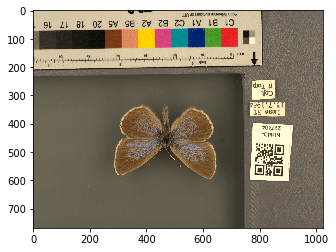

In [13]:
plt.imshow(img)
cv2.rotate?

In [ ]:
#resize images
for fp in tqdm(fps):
    new_fp = fp.replace('Original','LowRes').replace('arw','jpg')
    
    with rawpy.imread(fp) as raw:
        img = cv2.resize(raw.postprocess(),(1024,768))
    img = cv2.rotate(img,cv2.ROTATE_180)
    cv2.imwrite(new_fp,cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

  1%|          | 6/490 [00:31<43:14,  5.36s/it]

100%|██████████| 4/4 [00:00<00:00,  7.52it/s]


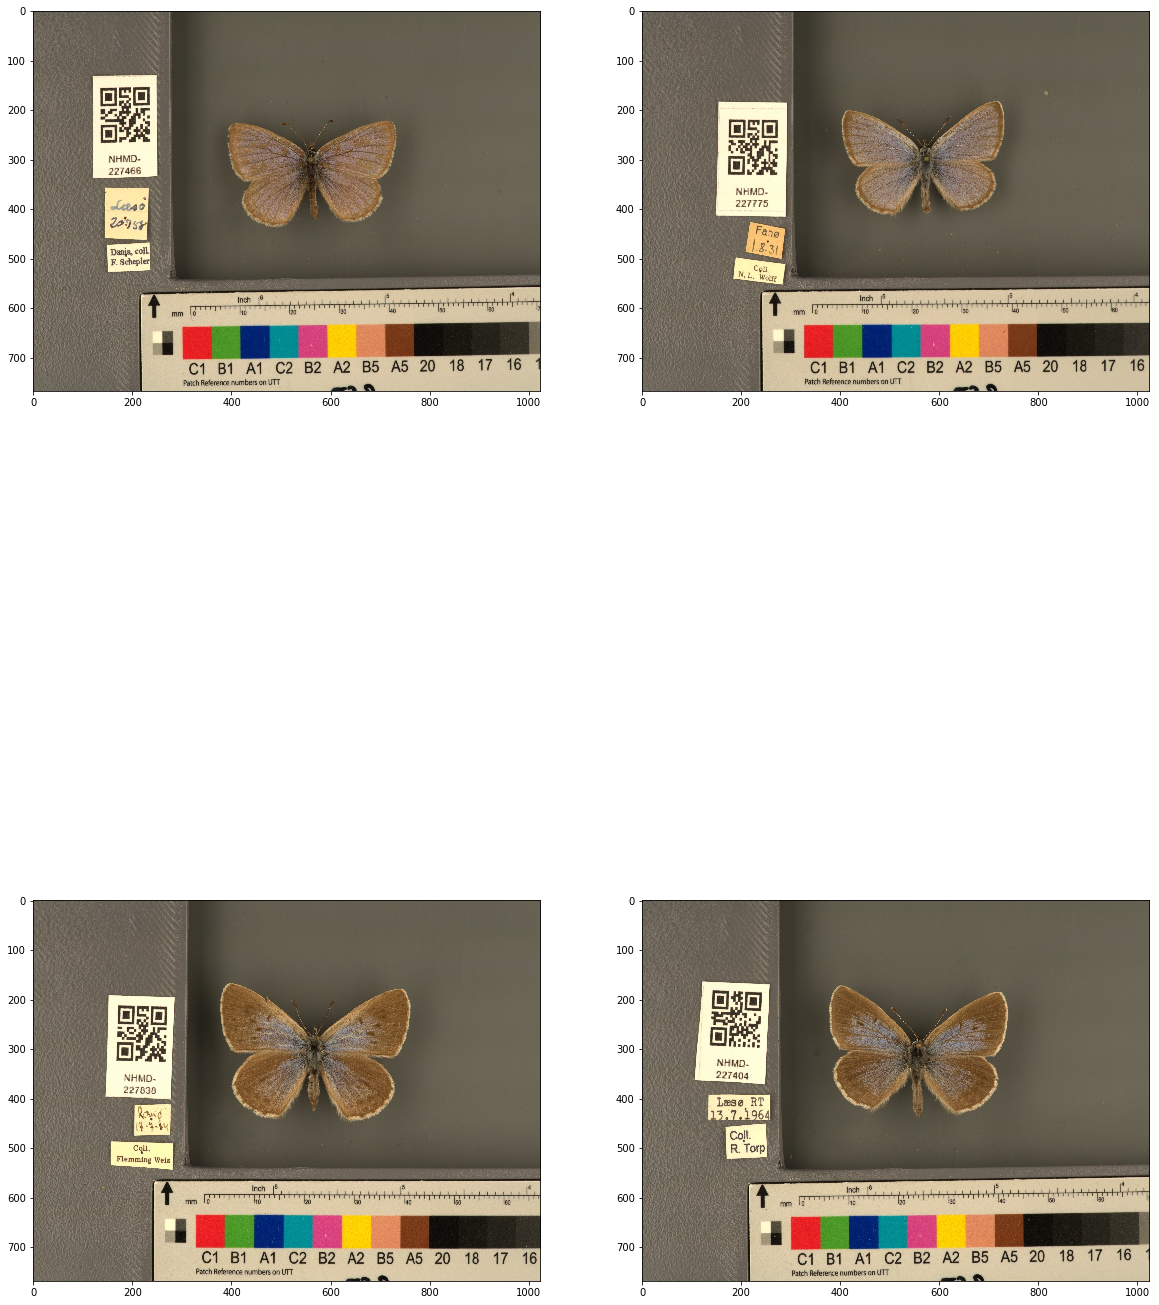

In [5]:
fig=plt.figure(figsize=(20, 30))
columns = 2
rows = 2
n_images = columns*rows


sample = np.random.permutation(fps[:300])

for i in tqdm(range(1, n_images +1)):
    fp = sample[i-1]
    img = cv2.imread(fp)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [6]:
global start_time
def start_timer():
    global start_time
    start_time = pd.Timestamp.now()
    
def tick(msg=''):
    print(msg + ', Time Taken: %s'%(pd.Timestamp.now() - start_time))
    
start_timer()
tick()

, Time Taken: 0 days 00:00:00.000050


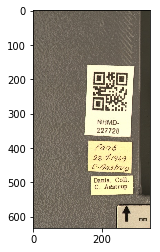

In [220]:

fp = np.random.choice(fps)
img = cv2.cvtColor(cv2.imread(fp),cv2.COLOR_BGR2RGB)
plt.imshow(crop(img))

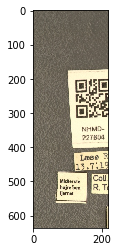

In [209]:

fp = np.random.choice(fps)
img = cv2.cvtColor(cv2.imread(fp),cv2.COLOR_BGR2RGB)
start_timer()
n_strips = 100
bottom = img.shape[0]
left = 0
right = img.shape[1]

#find bottom
halfway = img.shape[0]//2
strip_height = halfway//n_strips
strip_width = img.shape[1]//n_strips

for i in range(n_strips):
    start = halfway + i*strip_height
    end = halfway + (i+1)*strip_height
    strip = cv2.cvtColor(img[start:end,:,:],cv2.COLOR_RGB2HSV)[:,:,0]

    #plt.figure()
    #plt.imshow(strip)
    _mean = strip.mean()
    #bins = [0,127,255]
    #dens, _ = np.histogram(strip, bins=bins, density=True)
    #dens = dens*[127,128] #numpy normalizes also by the size of the bin
    #plt.title(str(dens) + ' ' +  str(strip.max()) + '  ' + str(strip.mean()))
    if _mean > 30:
        bottom = start
        break
        
#find right edge 
for i in range(n_strips):
    start = i*strip_width
    end = (i+1)*strip_width
    strip = cv2.cvtColor(img[:,start:end,:],cv2.COLOR_RGB2HSV)[:,:,0]

    #plt.figure()
    #plt.imshow(strip)
    bins = [0,20,255]
    dens, _ = np.histogram(strip, bins=bins, density=True)
    dens = dens*[20,255-20] #numpy normalizes also by the size of the bin
    #plt.title(str(dens) + ', ' + str(strip.max()) + '  ' + str(strip.mean()))
    if (dens[0] < 0.2) & (start > 100):
        right = start
        break
plt.imshow(img[:bottom,:right])        

In [225]:
def crop(img):
    start_timer()
    n_strips = 100
    bottom = img.shape[0]
    left = 0
    right = img.shape[1]

    #find bottom
    halfway = img.shape[0]//2
    strip_height = halfway//n_strips
    strip_width = img.shape[1]//n_strips

    for i in range(n_strips):
        start = halfway + i*strip_height
        end = halfway + (i+1)*strip_height
        strip = cv2.cvtColor(img[start:end,:,:],cv2.COLOR_RGB2HSV)[:,:,0]

        #plt.figure()
        #plt.imshow(strip)
        _mean = strip.mean()
        #bins = [0,127,255]
        #dens, _ = np.histogram(strip, bins=bins, density=True)
        #dens = dens*[127,128] #numpy normalizes also by the size of the bin
        #plt.title(str(dens) + ' ' +  str(strip.max()) + '  ' + str(strip.mean()))
        if _mean > 30:
            bottom = start - 100
            break

    #find right edge 
    for i in range(n_strips):
        start = i*strip_width
        end = (i+1)*strip_width
        strip = cv2.cvtColor(img[:,start:end,:],cv2.COLOR_RGB2HSV)[:,:,0]

        #plt.figure()
        #plt.imshow(strip)
        bins = [0,20,255]
        dens, _ = np.histogram(strip, bins=bins, density=True)
        dens = dens*[20,255-20] #numpy normalizes also by the size of the bin
        #plt.title(str(dens) + ', ' + str(strip.max()) + '  ' + str(strip.mean()))
        if (dens[0] < 0.2) & (start > 100):
            right = start
            break
    #plt.imshow(img[:bottom,:right])  
    return img[:bottom,:right,:]

In [ ]:
crop(img)

, Time Taken: 0 days 00:00:00.010204
, Time Taken: 0 days 00:00:00.008688
, Time Taken: 0 days 00:00:00.008879
, Time Taken: 0 days 00:00:00.011123
, Time Taken: 0 days 00:00:00.010943
, Time Taken: 0 days 00:00:00.010727
, Time Taken: 0 days 00:00:00.009939
, Time Taken: 0 days 00:00:00.010279
, Time Taken: 0 days 00:00:00.009794
, Time Taken: 0 days 00:00:00.009296



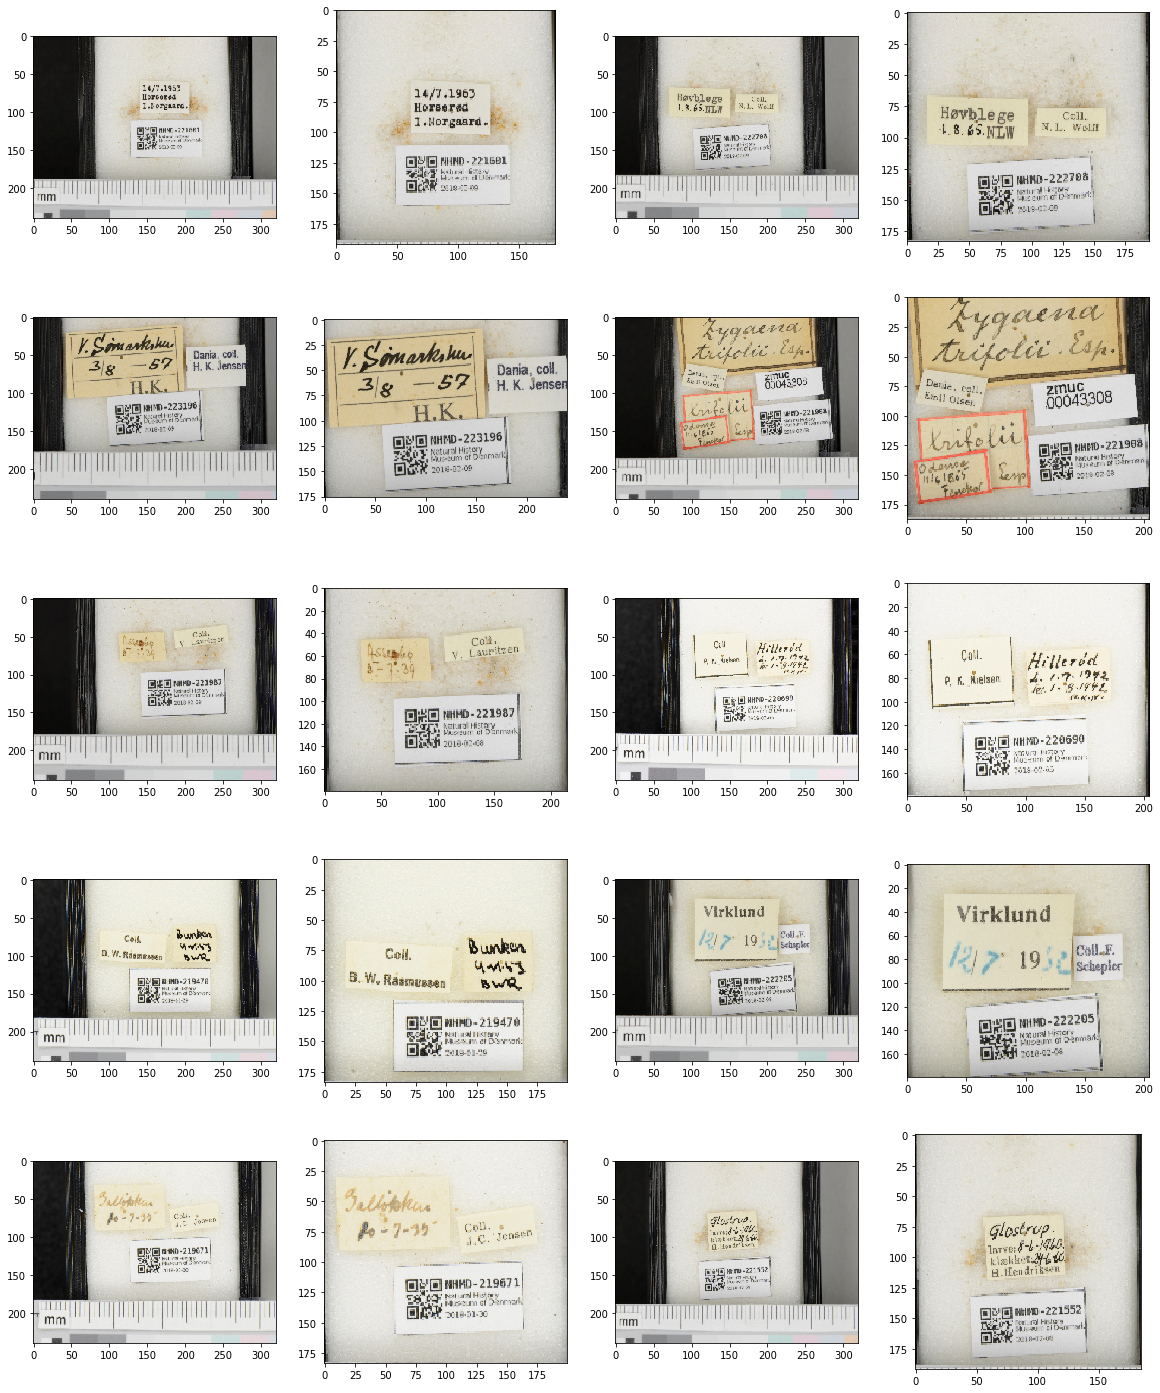

In [93]:
fig=plt.figure(figsize=(20, 25))
columns = 2
rows = 5
n_images = columns*rows

sample = np.random.permutation(fps)

for i in tqdm(range(1, n_images+1)):
    fp = sample[i-1]
    img = cv2.resize(cv2.imread(fp),(160*2,120*2))
    fig.add_subplot(rows, columns*2, i*2 -1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    cropped = crop(img)
    fig.add_subplot(rows, columns*2, i*2)
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show()

In [51]:
strip_width

184

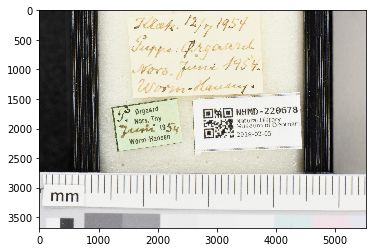

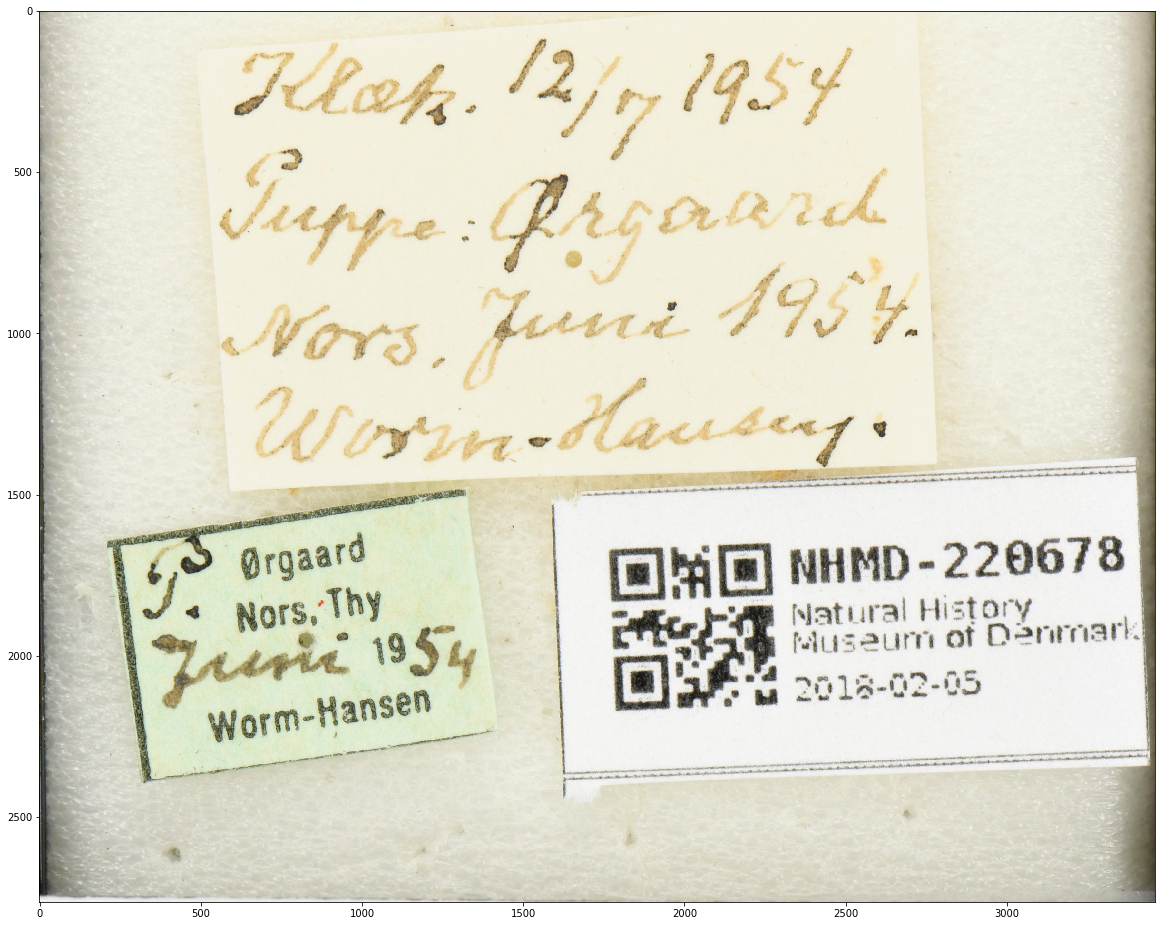

In [32]:
num = np.random.choice(range(3800))
fp = fps[num]
#fp = '/home/rob/HWR/datasets/zooniverse/221177/Preview002.jpg'

raw = cv2.imread(fp)
plt.figure()
plt.imshow(cv2.cvtColor(raw, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(crop(raw), cv2.COLOR_BGR2RGB))

In [226]:
for fp in tqdm(fps):
    new_fp = fp.replace('LowRes', 'Cropped')
    img = cv2.cvtColor(cv2.imread(fp),cv2.COLOR_BGR2RGB)
    cropped = cv2.cvtColor(crop(img),cv2.COLOR_RGB2BGR)
    cv2.imwrite(new_fp, cropped)

100%|██████████| 488/488 [00:17<00:00, 27.14it/s]
